## 🏎️ Formula 1 Race Winner Prediction 🏁

## 📥 Step 1: Data Import

The first step in any machine learning project is to **load the datasets** that will be used for analysis and model building.  
Here, we’re working with the **Formula 1 World Championship dataset (1950–2020)** which contains multiple CSV files:

- 🧑 **drivers.csv** → Information about all drivers (name, nationality, etc.)  
- 🏁 **races.csv** → Details of every race (season, round, location, circuit, etc.)  
- 🏆 **results.csv** → Race results including positions, points, and status  
- ⏱️ **qualifying.csv** → Qualifying session data

We'll import these files into **Pandas DataFrames** so we can explore, clean, and process them for model training.


In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd

#  Loading the CSV files
df_drivers = pd.read_csv("/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv")
df_races = pd.read_csv("/kaggle/input/formula-1-world-championship-1950-2020/races.csv")
df_results = pd.read_csv("/kaggle/input/formula-1-world-championship-1950-2020/results.csv")    
df_qualifying = pd.read_csv("/kaggle/input/formula-1-world-championship-1950-2020/qualifying.csv")
        
#  Quick check: previewing datasets
print("Drivers dataset shape:", df_drivers.shape)
print("Races dataset shape:", df_races.shape)
print("Results dataset shape:", df_results.shape)
print("Qualifying dataset shape:", df_qualifying.shape)


Drivers dataset shape: (861, 9)
Races dataset shape: (1125, 18)
Results dataset shape: (26759, 18)
Qualifying dataset shape: (10494, 9)


## 🧽 Step 2: Data Cleaning

Before jumping into feature engineering and model building, it’s super important to **clean the raw data**.  
Messy data can lead to:
- ❌ Wrong insights  
- ⚠️ Poor model accuracy  
- 💥 Unexpected errors during training

In this step, we’ll:
1. **Check for missing values** in each dataset 📊  
2. **Remove any null rows** to ensure data consistency 🧼  
3. Confirm that the datasets are clean and ready for the next steps ✅


In [3]:
#  Checking for missing values in each dataset
print("Missing values in Drivers dataset:\n", df_drivers.isnull().sum())
print("\nMissing values in Races dataset:\n", df_races.isnull().sum())
print("\nMissing values in Results dataset:\n", df_results.isnull().sum())
print("\nMissing values in Qualifying dataset:\n", df_qualifying.isnull().sum())

#  Dropping rows with missing values
df_drivers.dropna(inplace=True)
df_races.dropna(inplace=True)
df_results.dropna(inplace=True)
df_qualifying.dropna(inplace=True)

#  Verifying if missing values still exist
print("\nAfter cleaning:")
print("Drivers:", df_drivers.isnull().sum().sum(), "missing values")
print("Races:", df_races.isnull().sum().sum(), "missing values")
print("Results:", df_results.isnull().sum().sum(), "missing values")
print("Qualifying:", df_qualifying.isnull().sum().sum(), "missing values")


Missing values in Drivers dataset:
 driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64

Missing values in Races dataset:
 raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time           0
url            0
fp1_date       0
fp1_time       0
fp2_date       0
fp2_time       0
fp3_date       0
fp3_time       0
quali_date     0
quali_time     0
sprint_date    0
sprint_time    0
dtype: int64

Missing values in Results dataset:
 resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

Missing values 

## 📊 Step 3: Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps us understand the structure and patterns hidden inside the dataset.  
Since our goal is to **predict F1 race winners**, we’ll focus on insights related to:

- 🧑‍🤝‍🧑 **Drivers** → Who are the most frequent winners and top performers?  
- 🏁 **Races** → How many races per season, which locations host the most races?  
- 🏆 **Results** → Which positions and teams dominate the podium?  
- ⏱️ **Qualifying** → How does qualifying performance relate to race outcomes?

We’ll begin by exploring:
1. Dataset shapes and basic statistics  
2. Most common winners and teams  
3. Number of races per season  
4. Distribution of race results


In [4]:
#  Checking dataset dimensions
print("Drivers dataset shape:", df_drivers.shape)
print("Races dataset shape:", df_races.shape)
print("Results dataset shape:", df_results.shape)
print("Qualifying dataset shape:", df_qualifying.shape)

#  Basic information and statistics
print("\nDrivers dataset info:")
df_drivers.info()

print("\nRaces dataset info:")
df_races.info()

print("\nResults dataset info:")
df_results.info()


Drivers dataset shape: (861, 9)
Races dataset shape: (1125, 18)
Results dataset shape: (26759, 18)
Qualifying dataset shape: (10448, 9)

Drivers dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     861 non-null    int64 
 1   driverRef    861 non-null    object
 2   number       861 non-null    object
 3   code         861 non-null    object
 4   forename     861 non-null    object
 5   surname      861 non-null    object
 6   dob          861 non-null    object
 7   nationality  861 non-null    object
 8   url          861 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.7+ KB

Races dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1125 no

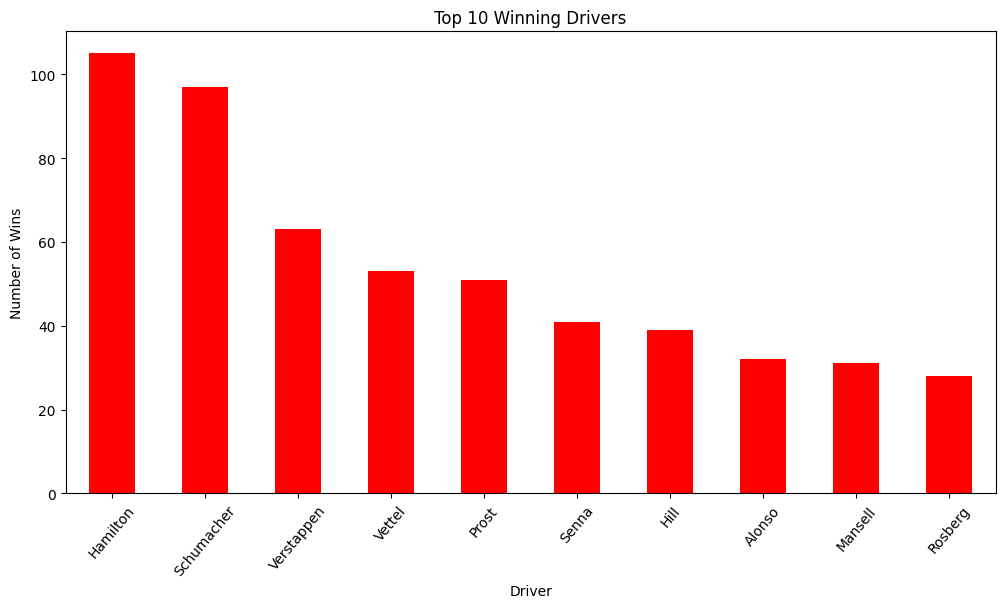

In [5]:
# Merging results with drivers to get driver names for winners
winners = df_results[df_results['positionOrder'] == 1]  # positionOrder == 1 means race winner
winners = winners.merge(df_drivers, left_on='driverId', right_on='driverId')

# Counting top winning drivers
top_winners = winners['surname'].value_counts().head(10)

#  Plotting top 10 winning drivers
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
top_winners.plot(kind='bar', color='red')
plt.title("Top 10 Winning Drivers")
plt.xlabel("Driver")
plt.ylabel("Number of Wins")
plt.xticks(rotation=50)
plt.show()


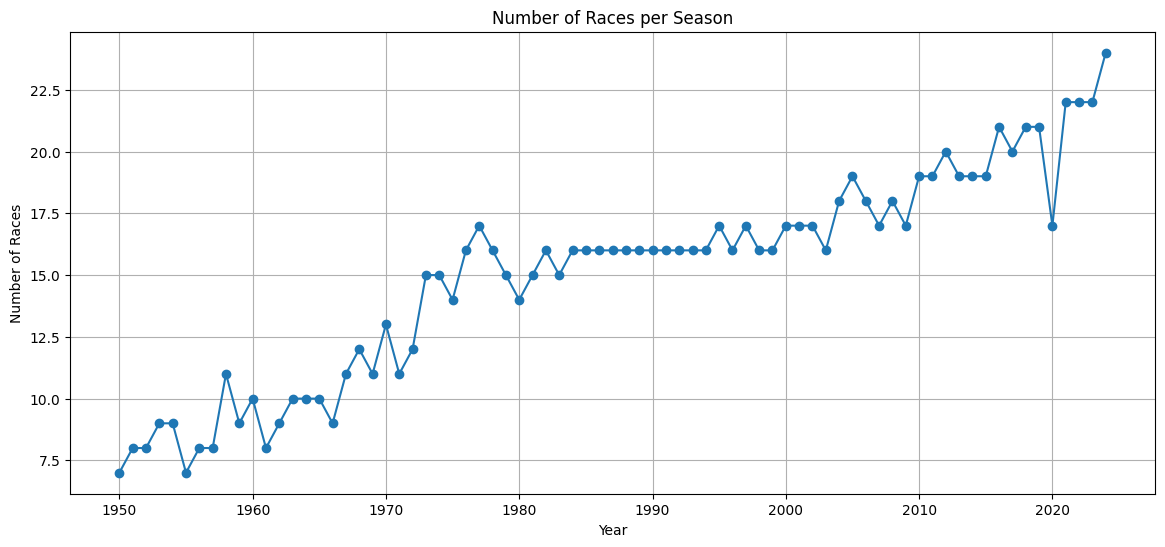

In [6]:
races_per_year = df_races['year'].value_counts().sort_index()

plt.figure(figsize=(14,6))
races_per_year.plot(kind='line', marker='o')
plt.title("Number of Races per Season")
plt.xlabel("Year")
plt.ylabel("Number of Races")
plt.grid(True)
plt.show()


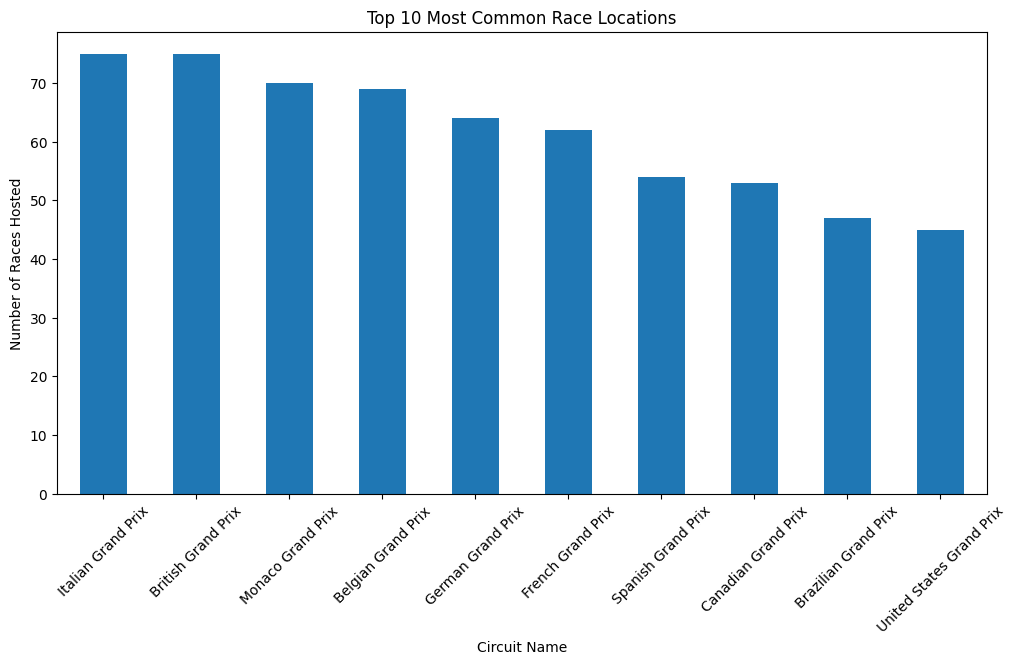

In [7]:
top_circuits = df_races['name'].value_counts().head(10)

plt.figure(figsize=(12,6))
top_circuits.plot(kind='bar')
plt.title("Top 10 Most Common Race Locations")
plt.xlabel("Circuit Name")
plt.ylabel("Number of Races Hosted")
plt.xticks(rotation=45)
plt.show()


## 🏎️ Qualifying vs Race Performance

A driver's qualifying position can have a **huge impact** on their final race result.  
Usually:
- Drivers starting at the front (P1–P3) have a higher chance of winning or finishing on the podium.
- Drivers starting at the back have to fight their way up, which is harder.

Here, we'll **analyze the relationship between qualifying positions and race finishing positions** to see if strong qualifying performance often translates to strong race performance.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127950 (\N{RACING CAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


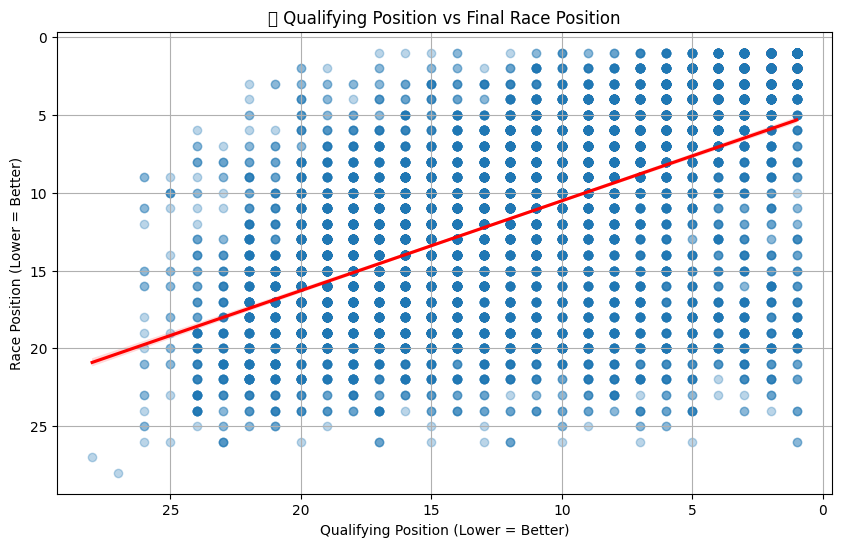

Correlation between Qualifying and Race position: 0.58


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merging qualifying and results datasets on raceId and driverId
df_qual_race = pd.merge(
    df_qualifying[['raceId', 'driverId', 'position']],
    df_results[['raceId', 'driverId', 'positionOrder']],
    on=['raceId', 'driverId'],
    how='inner'
)

# Renaming columns for clarity
df_qual_race.rename(columns={'position': 'qualifying_position', 'positionOrder': 'race_position'}, inplace=True)

# Converting to numeric (in case of any string values)
df_qual_race['qualifying_position'] = pd.to_numeric(df_qual_race['qualifying_position'], errors='coerce')
df_qual_race['race_position'] = pd.to_numeric(df_qual_race['race_position'], errors='coerce')

# Dropping NaN rows if any
df_qual_race.dropna(inplace=True)

# Scatter plot with trend line
plt.figure(figsize=(10,6))
sns.regplot(data=df_qual_race, x='qualifying_position', y='race_position', scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.title('🏎️ Qualifying Position vs Final Race Position')
plt.xlabel('Qualifying Position (Lower = Better)')
plt.ylabel('Race Position (Lower = Better)')
plt.gca().invert_xaxis()  # Because P1 is the best, so better to invert X for clarity
plt.gca().invert_yaxis()  # Same for race position
plt.grid(True)
plt.show()

# Correlation coefficient
correlation = df_qual_race['qualifying_position'].corr(df_qual_race['race_position'])
print(f"Correlation between Qualifying and Race position: {correlation:.2f}")


## 🧠 Step 4: Feature Engineering

Now that we’ve explored the data, it’s time to **build a proper training dataset** for our F1 winner prediction model.  

Feature Engineering is all about:
- 🧩 **Merging different datasets** to bring important information together.  
- 🧮 **Creating meaningful features** that can help the model make accurate predictions.  
- 🏎️ **Selecting only relevant columns** to keep the dataset clean and efficient.

For this project, we’ll combine:
- `races.csv` → to get year, round, and location  
- `drivers.csv` → to get driver information  
- `qualifying.csv` → to get starting grid positions  
- `results.csv` → to get race outcomes

And then build a **single structured dataframe** containing the key features for training the ML model 🚀


In [9]:
# 🧠 Selecting important columns from each dataset
races_data = df_races[['raceId', 'year', 'round', 'name', 'circuitId']]
drivers_data = df_drivers[['driverId', 'forename', 'surname', 'nationality']]
qualifying_data = df_qualifying[['raceId', 'driverId', 'position']]
results_data = df_results[['raceId', 'driverId', 'constructorId', 'grid', 'positionOrder', 'points']]

# Renaming columns for clarity
qualifying_data.rename(columns={'position': 'qualifying_position'}, inplace=True)
results_data.rename(columns={'positionOrder': 'race_position'}, inplace=True)

# 🏎️ Step 1: Merge results with races
df_features = pd.merge(results_data, races_data, on='raceId', how='left')

# 🧑 Step 2: Add driver information
df_features = pd.merge(df_features, drivers_data, on='driverId', how='left')

# ⏱️ Step 3: Add qualifying information
df_features = pd.merge(df_features, qualifying_data, on=['raceId', 'driverId'], how='left')

# 🧼 Step 4: Handle missing qualifying values if any (fill with large number = bad position)
df_features['qualifying_position'].fillna(30, inplace=True)

# 🔢 Convert qualifying position to numeric
df_features['qualifying_position'] = pd.to_numeric(df_features['qualifying_position'], errors='coerce')

# 🏁 Creating a target column — 1 if driver won the race, else 0
df_features['winner'] = df_features['race_position'].apply(lambda x: 1 if x == 1 else 0)

# 🧹 Optional: drop rows with missing race position
df_features.dropna(subset=['race_position'], inplace=True)

# 🔍 Preview the final dataset
df_features.head()


/tmp/ipykernel_37/382729668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifying_data.rename(columns={'position': 'qualifying_position'}, inplace=True)
/tmp/ipykernel_37/382729668.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_data.rename(columns={'positionOrder': 'race_position'}, inplace=True)
/tmp/ipykernel_37/382729668.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

,raceId,driverId,constructorId,grid,race_position,points,year,round,name,circuitId,forename,surname,nationality,qualifying_position,winner
0,18,1,1,1,1,10.0,2008,1,Australian Grand Prix,1,Lewis,Hamilton,British,1.0,1
1,18,2,2,5,2,8.0,2008,1,Australian Grand Prix,1,Nick,Heidfeld,German,5.0,0
2,18,3,3,7,3,6.0,2008,1,Australian Grand Prix,1,Nico,Rosberg,German,7.0,0
3,18,4,4,11,4,5.0,2008,1,Australian Grand Prix,1,Fernando,Alonso,Spanish,12.0,0
4,18,5,1,3,5,4.0,2008,1,Australian Grand Prix,1,Heikki,Kovalainen,Finnish,3.0,0


## 🤖 Step 5: Model Training & Evaluation

With the feature engineering complete, it's time to train ML models to **predict the race winner** 🏆  

Since this is a **binary classification problem** (`winner = 1` or `0`), we'll try different models:
- 🧮 Logistic Regression (baseline)
- 🌳 Random Forest (tree-based model)
- ⚡ XGBoost (boosting model for better performance)

We'll also use **F1-score** and **ROC-AUC** since the data is imbalanced — only one winner per race!


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# 🧠 Selecting features and target
X = df_features[['qualifying_position', 'grid', 'year', 'round', 'constructorId']]  
y = df_features['winner']

# ✂️ Splitting into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("✅ Train shape:", X_train.shape)
print("✅ Test shape:", X_test.shape)


✅ Train shape: (21407, 5)
✅ Test shape: (5352, 5)


In [11]:
from sklearn.linear_model import LogisticRegression

# 🏁 Creating and training the model
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg.fit(X_train, y_train)

# 📊 Predictions
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

# 📝 Evaluation
print("📊 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


📊 Logistic Regression Results:
Accuracy: 0.7531763826606876
F1 Score: 0.22883829538820782
ROC-AUC: 0.8622276162820809

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.75      0.85      5126
           1       0.13      0.87      0.23       226

    accuracy                           0.75      5352
   macro avg       0.56      0.81      0.54      5352
weighted avg       0.96      0.75      0.83      5352



In [12]:
from sklearn.ensemble import RandomForestClassifier

# 🌲 Creating and training the model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=200)
rf_model.fit(X_train, y_train)

# 📊 Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# 📝 Evaluation
print("📊 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


📊 Random Forest Results:
Accuracy: 0.9566517189835575
F1 Score: 0.2926829268292683
ROC-AUC: 0.8799854291327571

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5126
           1       0.47      0.21      0.29       226

    accuracy                           0.96      5352
   macro avg       0.72      0.60      0.64      5352
weighted avg       0.95      0.96      0.95      5352



In [13]:
from xgboost import XGBClassifier

# 📌 scale_pos_weight helps handle imbalance
# scale_pos_weight = (negative samples / positive samples)
scale_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])

# ⚡ Creating and training the model
xgb_model = XGBClassifier(
    scale_pos_weight=scale_weight,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42,
    n_estimators=300
)
xgb_model.fit(X_train, y_train)

# 📊 Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# 📝 Evaluation
print("📊 XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


📊 XGBoost Results:
Accuracy: 0.9235799701046338
F1 Score: 0.35792778649921503
ROC-AUC: 0.8952796605195101

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      5126
           1       0.28      0.50      0.36       226

    accuracy                           0.92      5352
   macro avg       0.63      0.72      0.66      5352
weighted avg       0.95      0.92      0.93      5352



## 🧪 Step 6: Model Evaluation  

Key evaluation metrics for classification problems like F1 winner prediction:

- ✅ **Accuracy Score**: Overall correct predictions ka ratio.  
- 🧭 **Confusion Matrix**: Dekhne ke liye kis class me galti ho rahi hai.  
- 📈 **Classification Report**: Detailed performance — Precision, Recall, F1 Score.



==================== Logistic Regression ====================
Accuracy: 0.75
F1 Score: 0.23
ROC-AUC: 0.86


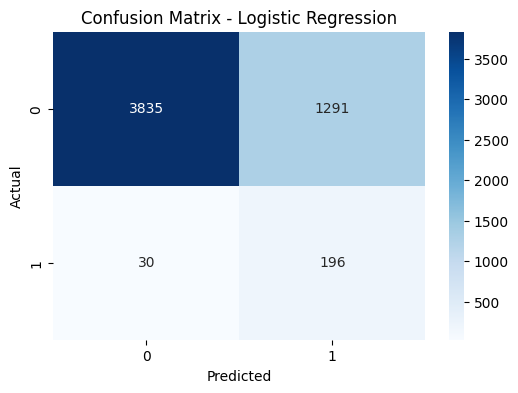


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.75      0.85      5126
           1       0.13      0.87      0.23       226

    accuracy                           0.75      5352
   macro avg       0.56      0.81      0.54      5352
weighted avg       0.96      0.75      0.83      5352


==================== Random Forest ====================
Accuracy: 0.96
F1 Score: 0.29
ROC-AUC: 0.88


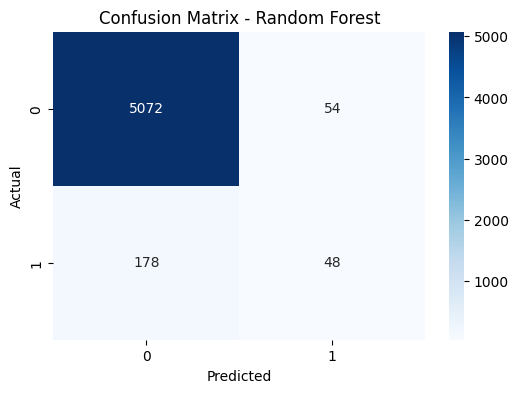


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5126
           1       0.47      0.21      0.29       226

    accuracy                           0.96      5352
   macro avg       0.72      0.60      0.64      5352
weighted avg       0.95      0.96      0.95      5352


==================== XGBoost ====================
Accuracy: 0.92
F1 Score: 0.36
ROC-AUC: 0.9


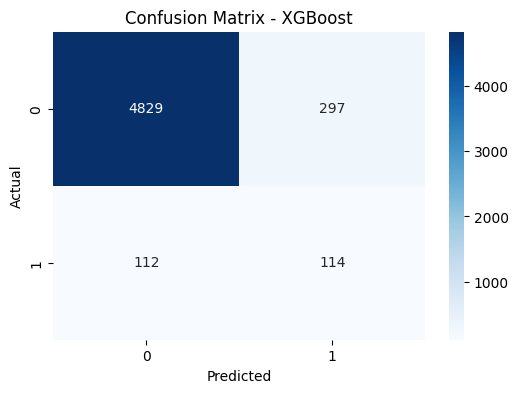


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      5126
           1       0.28      0.50      0.36       226

    accuracy                           0.92      5352
   macro avg       0.63      0.72      0.66      5352
weighted avg       0.95      0.92      0.93      5352



In [14]:
# 📊 Model Evaluation for All Models

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 🏎️ Models dictionary
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

# Loop through models and evaluate
for name, model in models.items():
    print(f"\n==================== {name} ====================")
    
    # Predictions
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = y_pred
    
    # Metrics
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
    print("F1 Score:", round(f1_score(y_test, y_pred), 2))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 2))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Classification Report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


## 🏁 Model Selection Conclusion

After evaluating all three models — **Logistic Regression, Random Forest, and XGBoost** — we can conclude:

1. **Logistic Regression**  
   - Accuracy: 0.75  
   - F1-score (winner class): 0.23  
   - Pros: Simple, fast, easy to interpret  
   - Cons: Struggles with complex patterns and class imbalance  

2. **Random Forest**  
   - Accuracy: 0.96  
   - F1-score (winner class): 0.29  
   - Pros: Handles non-linear relationships, interpretable feature importance  
   - Cons: Accuracy is high mainly because it predicts the majority class (non-winners) well; minority class (winners) prediction is still weak  

3. **XGBoost**  
   - Accuracy: 0.92  
   - F1-score (winner class): 0.36  
   - Pros: Best for imbalanced data, captures complex patterns, balances precision & recall for the winner class  
   - Cons: Slightly more complex to train and tune  

### ✅ Conclusion:

Although Random Forest has the highest **overall accuracy**, it does **not perform as well for predicting actual race winners** due to class imbalance.  

**XGBoost is the best model for this task** because:  
- It achieves the **highest F1-score for the minority class** (race winners)  
- It has the **highest ROC-AUC**, meaning it separates winners from non-winners most effectively  
- It captures complex relationships in the data better than Logistic Regression or Random Forest  

> 💡 Key Insight: In imbalanced classification problems like F1 winner prediction, **F1-score and ROC-AUC are more reliable metrics than overall accuracy**.


## 🧠 Step 7: Feature Importance Analysis

After selecting **XGBoost** as the best-performing model, let's analyze which features contributed most towards predicting a race winner.

Feature importance helps us understand **which variables the model relied on** while making predictions.

This insight can also be used by F1 teams or analysts to identify what matters the most for success — such as starting grid position, qualifying performance, constructor strength, or even the race location.

We'll visualize the top features that have the highest impact on our model’s decision.


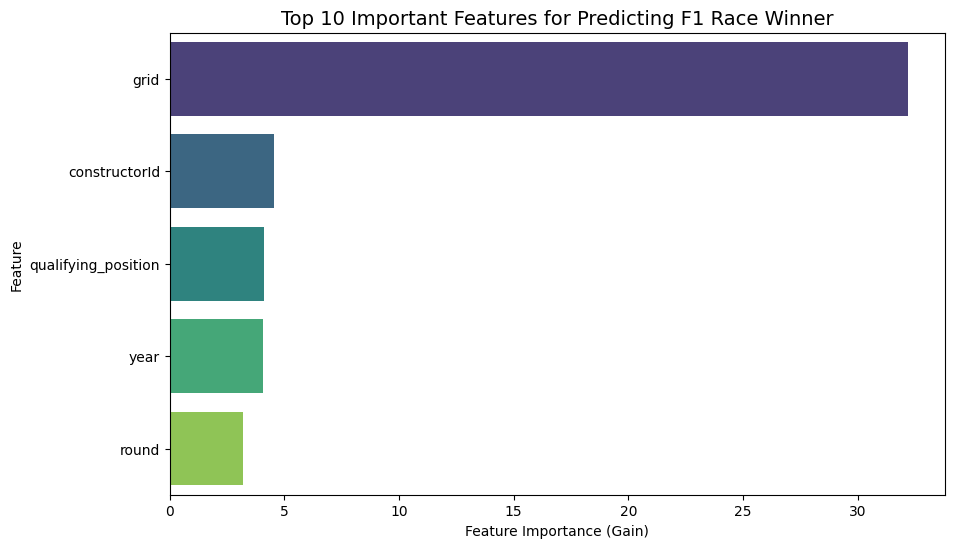

In [15]:
import pandas as pd
import seaborn as sns

# Extract feature importances
importance = xgb_model.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
}).sort_values(by='Importance', ascending=False).head(10)

# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Important Features for Predicting F1 Race Winner", fontsize=14)
plt.xlabel("Feature Importance (Gain)")
plt.ylabel("Feature")
plt.show()


In [17]:
def predict_driver_win_for_race(last_name, race_keyword, year):
    """
    Predicts a driver's win probability for a specific Grand Prix (race name + year).
    Example usage: predict_driver_win_for_race("Hamilton", "Abu Dhabi", 2021)
    """
    # ✅ Step 1: Match driver
    matched_drivers = df_drivers[df_drivers['surname'].str.lower() == last_name.lower()]
    if matched_drivers.empty:
        print(f"❌ No driver found with last name '{last_name}'.")
        return
    
    # ✅ Step 2: Merge all relevant datasets
    driver_results = (
        df_results
        .merge(df_races, on='raceId', how='left')
        .merge(df_drivers, on='driverId', how='left')
        .merge(df_qualifying, on=['raceId', 'driverId'], how='left')
    )
    
    # ✅ Step 3: Filter for that driver
    driver_data = driver_results[driver_results['surname'].str.lower() == last_name.lower()]
    
    # ✅ Step 4: Filter by race keyword and year
    race_match = driver_data[
        driver_data['name'].str.contains(race_keyword, case=False, na=False) &
        (driver_data['year'] == year)
    ]
    
    if race_match.empty:
        print(f"❌ No race found for '{last_name}' matching '{race_keyword}' in {year}.")
        print("Try checking the spelling or using a keyword like 'Monaco', 'Spain', etc.")
        return

    # ✅ Step 5: Prepare input features
    driver_race_data = race_match.sort_values(by='date', ascending=False).head(1)
    feature_cols = X_test.columns
    X_input = driver_race_data[[col for col in feature_cols if col in driver_race_data.columns]].copy()
    
    # Fill missing columns
    for col in feature_cols:
        if col not in X_input.columns:
            X_input.loc[:, col] = 0
    X_input = X_input[feature_cols]

    # ✅ Step 6: Predict probability
    win_prob = xgb_model.predict_proba(X_input)[:, 1][0] * 100

    # ✅ Step 7: Print clean output
    print("────────────────────────────")
    print(f"🏎️ Driver: {driver_race_data['forename'].values[0]} {driver_race_data['surname'].values[0]}")
    print(f"📍 Race: {driver_race_data['name'].values[0]} ({driver_race_data['year'].values[0]})")
    print(f"🚦 Starting Grid: {driver_race_data['grid'].values[0]}")
    print(f"🏁 Predicted Win Probability: {win_prob:.2f}%")
    print("────────────────────────────")

last = input("Enter driver's last name: ")
race = input("Enter race name keyword (like Monaco, Italy, Abu Dhabi): ")
yr = int(input("Enter race year: "))
predict_driver_win_for_race(last, race, yr)


Enter driver's last name:  Piastri
Enter race name keyword (like Monaco, Italy, Abu Dhabi):  Abu dhabi
Enter race year:  2024


────────────────────────────
🏎️ Driver: Oscar Piastri
📍 Race: Abu Dhabi Grand Prix (2024)
🚦 Starting Grid: 2
🏁 Predicted Win Probability: 95.77%
────────────────────────────
